###  Retail Giant Sales Forecasting Assignment

#### Problem Statement

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.

As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

There are 21 unique "Market-Segments" for which the sales forecasts can be made. That is the dataset needs to be prepared such that you get the Order-Date, Sales and Profit for the 21 market segments.

Not all of these 21 market segments are important from the store’s point of view. You need to find out the most consistently profitable market-segment from the above and forecast the sales and demand for that single market-segment only and not for all.

Intially importing the libraries required

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [101]:
#Read the Data
retail = pd.read_csv('Global+Superstore+Data.csv')

In [102]:
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [103]:
# Datatypes of the datset
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [104]:
# Summary of the dataset
retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


### Data Preparation

Initially let's start visualizing most consistent and profitable segment

In [105]:
# lets create a new column combining segment and market
retail["Market_Segment"] = retail.Market + '_' + retail.Segment

In [106]:
retail.nunique()

Order Date         1430
Segment               3
Market                7
Sales             22995
Profit            24575
Market_Segment       21
dtype: int64

From the data, the unique segments are 3 and markets are 7.

After combining them market_segment we are getting 21 unique values.

In [107]:
# Lets see what are the unique markets first
retail.Market.value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

From the above data, the APAC market is consistent

In [108]:
# Now lets see the unique segments
retail.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

From the above data, the Consumer segment is more consistent than other two

In [109]:
# Now lets check value_counts for combined column market_segment
retail.Market_Segment.value_counts()

APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: Market_Segment, dtype: int64

it is clear that the APAC_Consumer market of consumer segment is consistent.

Canada_HomeOffice segment is poorly consistent

#### Now lets visualize the two parameters to deeper the understanding.
#### Market_Segment vs Profit

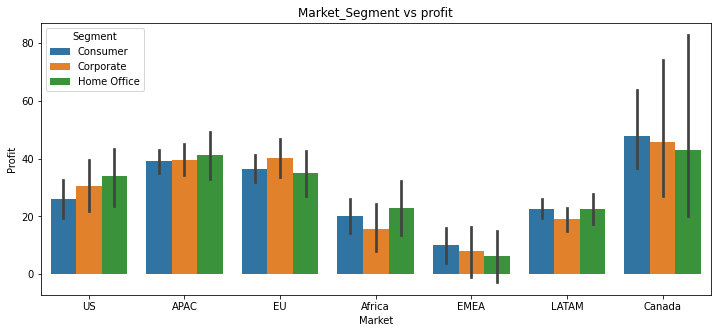

In [110]:
plt.figure(figsize=[12,5])
sns.barplot(x='Market',y='Profit',data=retail,hue='Segment')
plt.title('Market_Segment vs profit')
plt.show()

Surprisingly, Canada market has more profits, followed by APAC.

And EMEA has least profits

#### Market_Segment vs Sales

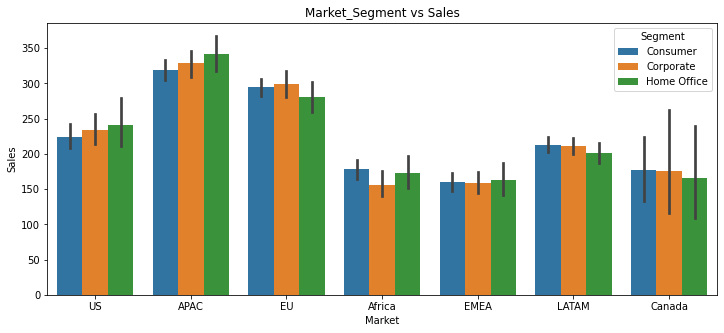

In [111]:

plt.figure(figsize=[12,5])
sns.barplot(x='Market',y='Sales',data=retail,hue='Segment')
plt.title('Market_Segment vs Sales')
plt.show()

Now, understood market's and segment's profit sales

As expected APAC market has highest sales

so let's drop the Market and Segment colums, as we already combined and assigned to new column

In [112]:
retail = retail.drop('Market',axis=1)
retail = retail.drop('Segment',axis=1)

In [113]:
retail.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


First lets convert Order Date column to monthly format

then, check Monthly aggregate transactions using pivot table

In [114]:
retail['Order Date'] = pd.to_datetime(retail['Order Date']).dt.to_period('m')
retail= retail.sort_values(by=['Order Date'])
retail.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [115]:
retail_profit = retail.pivot_table(index='Order Date',values='Profit',columns='Market_Segment',aggfunc='sum')
retail_profit.sort_values(by='Order Date')
retail_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


Lets split the dataset as per the instructions and then finding out CoV

In [116]:
#Splitting the retail_profit dataset
train_len = 42
train = retail_profit[0:train_len]
test = retail_profit[train_len:]

In [117]:
train.shape

(42, 21)

#### CoV(Coefficient of Variance)

Here, The coefficient of variance is used to forecast the most profitable market_segment.

which will normalise the standard deviation with the mean and give a comparative figure on the basis of which we can identify the most profitable market segment.

lesser the CoV higher the Profit of the market_segment

In [118]:
mean = np.mean(train)
std = np.std(train)

cov_df = pd.DataFrame(mean)
cov_df['std'] = std
cov_df['cov'] = std/mean
cov_df.columns = ['Mean','Std','Cov']
cov_df = cov_df.reset_index()
cov_df.sort_values(by='Cov',ascending=True,inplace=True)

In [119]:
cov_df

,Market_Segment,Mean,Std,Cov
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
12,EU_Consumer,3699.977143,2202.282289,0.595215
15,LATAM_Consumer,2295.555697,1569.632686,0.683770
13,EU_Corporate,2216.299429,1600.336696,0.722076
16,LATAM_Corporate,1122.633016,990.360880,0.882177
14,EU_Home Office,1224.456536,1148.627937,0.938072
2,APAC_Home Office,1511.088314,1523.508658,1.008219
18,US_Consumer,2686.740912,2715.031412,1.010530
19,US_Corporate,1754.199083,1880.200775,1.071829


In [120]:
min(cov_df['Cov'])

0.5227250555218101

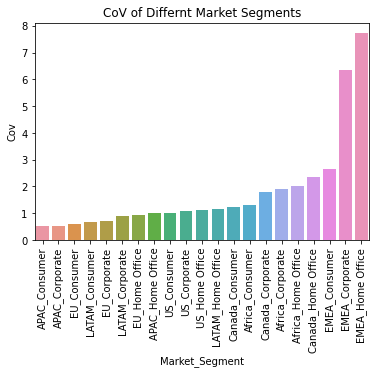

In [121]:
# Lets visualize the CoV using barplot
sns.barplot(x='Market_Segment',y='Cov',data=cov_df)
plt.title('CoV of Differnt Market Segments')
plt.xticks(rotation=90)
plt.show()

From the above barplot and the minimum value of CoV it is clear that *'APAC_Consumer'* market_segment has more profit

Now regain the original dtype of column 'Order Data'

In [122]:
retail['Order Date'] = retail['Order Date'].astype(str)
retail['Order Date'] = pd.to_datetime(retail['Order Date'])

We understood which market segment is more profitable.

Constrain the dataset to most profitable market_segment as given in the instructions

In [123]:
retail_df = retail[retail['Market_Segment'] == 'APAC_Consumer']
retail_df.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


Now groupby the data with respect to the profitable market_segment.

Saving the same in new Dataframe *Data*

In [124]:
data = pd.DataFrame(retail_df.groupby('Order Date')['Sales'].sum())
data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


#### Time Series Analysis

Plotting the time series graph to understand the trend and seasonality of the data

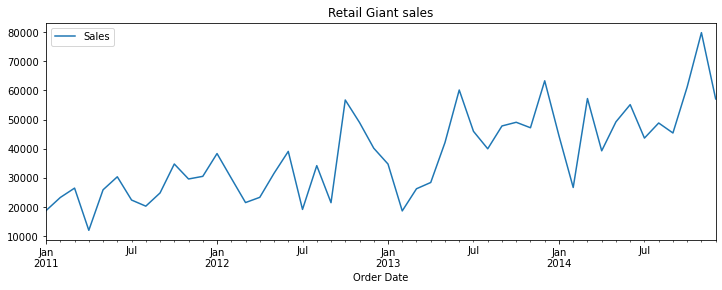

In [125]:
data.plot(figsize=[12,4])
plt.legend(loc='best')
plt.title('Retail Giant sales')
plt.show()

in the above chart there is no gaps, means no missing values

In [126]:
#lets confirm the missing values
data.isnull().sum()

Sales    0
dtype: int64

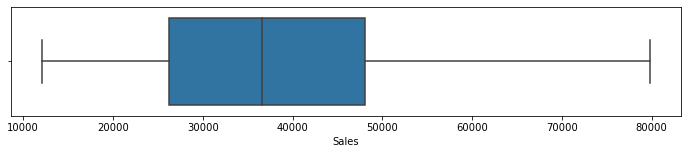

In [127]:
#Lets confirm outliers present in dataset or not
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Sales'])

#### Time Series Decomposition

#### Additive Seasonal Decomposition

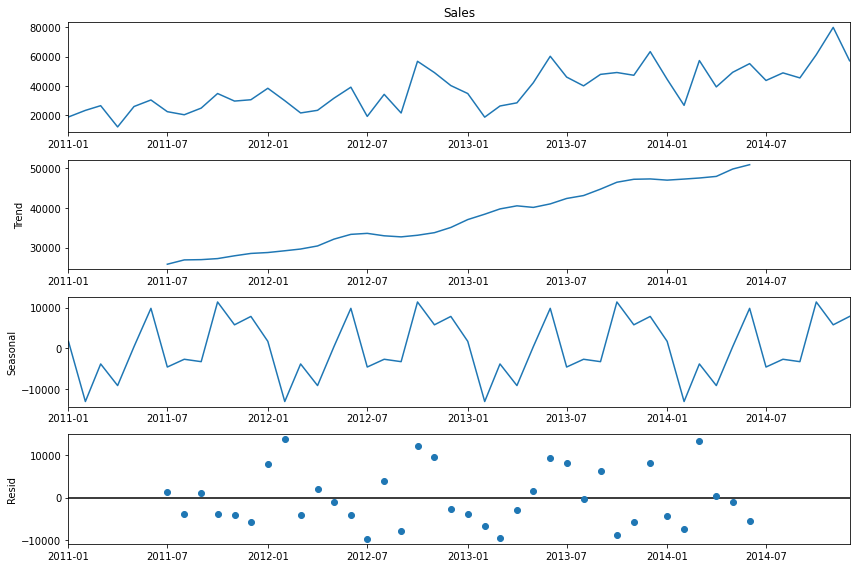

In [128]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

The Additive decmposition all the individual components are multiplied to get time-series.

- There is increase in trend from left to right in second graph

- There is seasonality also present as we can observe in third graph

#### Multiplicative Seasonal Decomposition

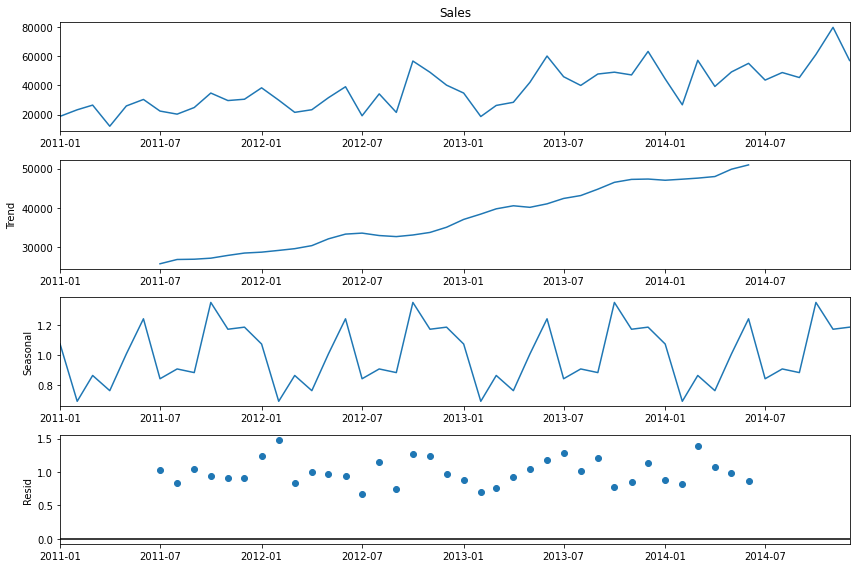

In [129]:
decomposition = sm.tsa.seasonal_decompose(data.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

- The multiplicative decomposition all the individual components are multiplied to get time-series.
- The Multiplicative decomposition is also showing almost same results as additive decmposition

### Build and Evaluate the Time series forecast

#### Lets Split the data into train and test datasets

Train len is taken to 42 months and the test as 6 months as per instructions

In [130]:
train_len = 42
train = data[0:train_len]
test = data[train_len:]

### Simple Time Series Methods

Steps to follow in all the methods
1. Evaluating method
2. Plotting the method to understand the forecasting obtained
3. Calculating the RMSE and MAPE

#### Naive Method

Forecast is based on last month's sales

In [131]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

#### Plot train-test forecast

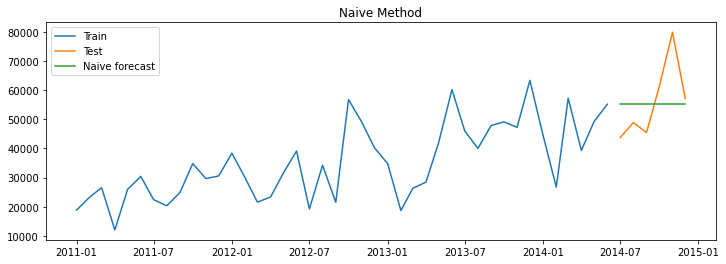

In [132]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

- From the above plot the *green line* is Naive forecast plotted based on the previous month data.
- The *Orange line* is the forecast from 07-2014 to 01-2015

#### Calculate Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE)

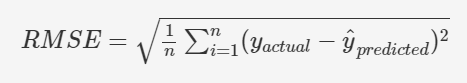

In [133]:
from PIL import Image
myImage = Image.open("RMSE.png");
myImage

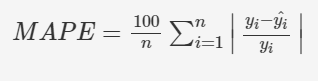

In [134]:
myImage1 = Image.open("MAPE.png");
myImage1

- mentioned the formulae of RMSE and MAPE for better understanding and Interpretation
- and this formulae is used in all the following forecasting techniques

In [135]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


#### Simple Average Method

In [136]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

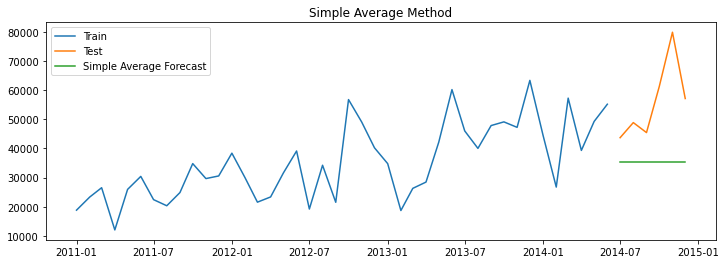

In [137]:
plt.figure(figsize=[12,4])
plt.plot(train['Sales'],label='Train')
plt.plot(test['Sales'],label='Test')
plt.plot(y_hat_avg['avg_forecast'],label='Simple Average Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

- From the above chart, the forecast is plotted, on the avergae of all past months.
- The green is neither appealing the actual trend we observed from the past months nor the seasonality.
- It is straight below the actual trend

In [138]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average Method'],'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34


- Comparitively naive method is forecasting better.
- lesser the MAPE better the forecast

#### Simple Moving Average Method

In [139]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

#### Plot train-test forecast

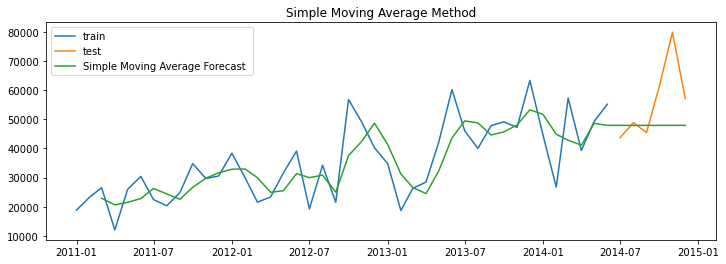

In [140]:
plt.figure(figsize=[12,4])
plt.plot(train['Sales'],label='train')
plt.plot(test['Sales'],label='test')
plt.plot(y_hat_sma['sma_forecast'],label='Simple Moving Average Forecast ')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

- From the plot we get a forecast of SMAP
- take the average of only the last few observations to forecast the future.
- green line was just continuation of the SMA.

In [141]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales'] - y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Moving Average Method'],'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82


We know lesser the MAPE better the Forecast, So here Simple Moving Average is giving better forecast than both of the above

### Exponential Methods

#### Simple Exponential Smoothing

In [142]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

The underlying idea of this technique is that each observation influencing yt+1 is assigned a specific weight. 
More recent observations get more weight, whereas the previous observations get less weight.

In [143]:
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized = False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

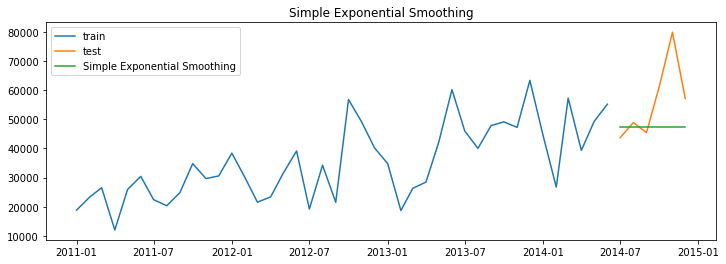

In [144]:
plt.figure(figsize=[12,4])
plt.plot(train['Sales'],label = 'train')
plt.plot(test['Sales'],label='test')
plt.plot(y_hat_ses['ses_forecast'],label = 'Simple Exponential Smoothing')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()

In [145]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Exponential Smoothing'],'RMSE':[rmse],'MAPE':[mape]})
results = pd.concat([results,tempResults])
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99


### Holt's Method

Holt's exponential smoothing technique which captures both level and trend of a time series in the forecast.

In [146]:
#importing Library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [147]:
model = ExponentialSmoothing(np.array(train['Sales']),seasonal_periods=3,trend='additive',seasonal=None)
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.01,optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


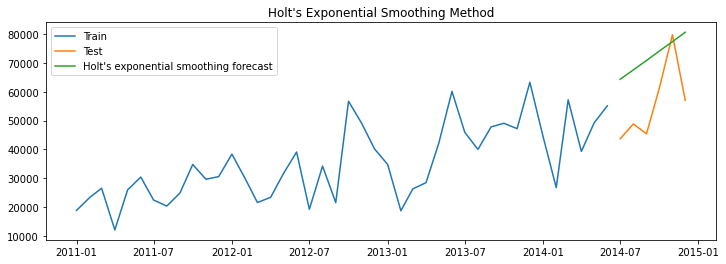

In [148]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

From the above plot, The Holt's exponential Smoothing gives the trend to the forecast.

In [149]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s Exponentail Smoothing'],'RMSE':[rmse],'MAPE':[mape]})

results = pd.concat([results,tempResults])
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponentail Smoothing,18976.37,34.57


#### Holt's Winter Exponential Smoothing - with trend 'additive' and seasonality

Holt-Winters' Exponential Smoothing technique which forecasts based on level, trend and seasonality of a time series.

In [150]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']),seasonal_periods=12,trend='add',seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325, 'initial_trend': 730.4167145833331, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


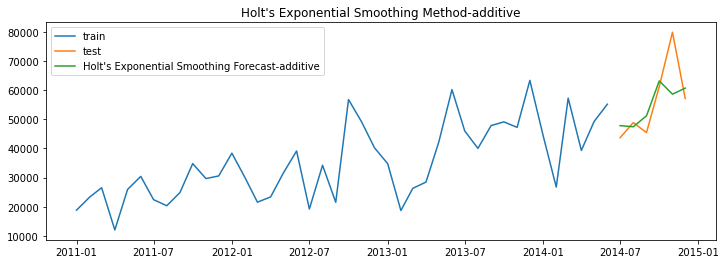

In [151]:
plt.figure(figsize=[12,4])
plt.plot(train['Sales'],label='train')
plt.plot(test['Sales'],label='test')
plt.plot(y_hat_hwa['hwa_forecast'],label='Holt\'s Exponential Smoothing Forecast-additive')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method-additive')
plt.show()

- From the above plot, the trend seasonality is forecasted correctly compared to previous data

In [152]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hwa_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponentail Smoothing,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17


Holt's Winter Additive Method gives the best forecast till now.
the MAPE value is also very less compared to other forecasting techniques 

#### Holt's Winter Exponential Smoothing - with trend 'Multiplicative' and seasonality

In [153]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325, 'initial_trend': 730.4167145833331, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


#### Plot train, test and forecast

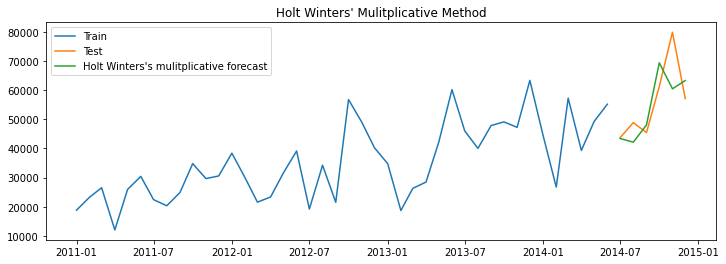

In [154]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

#### Calculate RMSE and MAPE

In [155]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hwm_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponentail Smoothing,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43


### Auto Regressive Methods

#### Stationary vs Non-Stationary Time Series

Most of the time, visually, you can see that the series has a clear trend or seasonal component to comment about its stationarity. However, you cannot say that for sure as you also have to test whether its statistical properties, such as mean, variance etc. remain constant.

 two formal tests for stationarity based on hypothesis testing

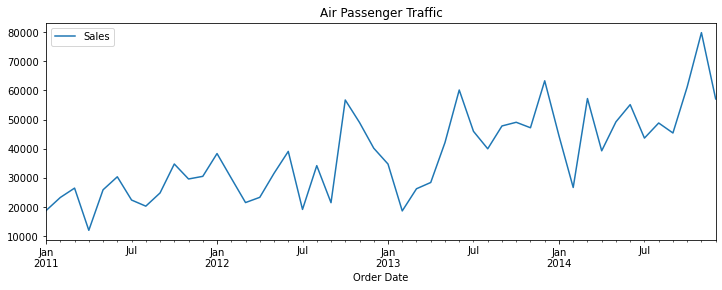

In [156]:
data['Sales'].plot(figsize=[12,4])
plt.legend(loc='best')
plt.title('Air Passenger Traffic')
plt.show(block=False)

#### Augmented Dickey-Fuller (ADF) Test

- Null Hypothesis (H0): The series is not stationary., p-values > 0.05
- Alternate Hypothesis (H1) : The series is stationary., p-values ≤ 0.05

In [157]:
#import libraries
from statsmodels.tsa.stattools import adfuller

In [158]:
adf_test = adfuller(data['Sales'])
print('ADF Statistic :%f' %adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value :%f' % adf_test[1])

ADF Statistic :-3.376024
Critical Values @ 0.05: -2.93
p-value :0.011804


Here p-value < 0.05. So series is stationary

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

- Null Hypothesis: The series is stationary.,p-values > 0.05
- Alternate Hypothesis (H1): The series is not stationary., p-values <= 0.05

In [159]:
#import libraries
from statsmodels.tsa.stattools import kpss

In [160]:
kpss_test = kpss(data['Sales'])
print('KPSS Statistic : %f' %kpss_test[0])
print('Critical Values @ 0.05 : %.2f' %kpss_test[3]['5%'])
print('p-value :%f' %kpss_test[1])

KPSS Statistic : 0.577076
Critical Values @ 0.05 : 0.46
p-value :0.024720


KPSS p-value > 0.05. So series is not stationary

#### Box Cox transformation to make variance constant

to convert a non-stationary series into a stationary series to build an Auto Regressive model.

In [161]:
from scipy.stats import boxcox

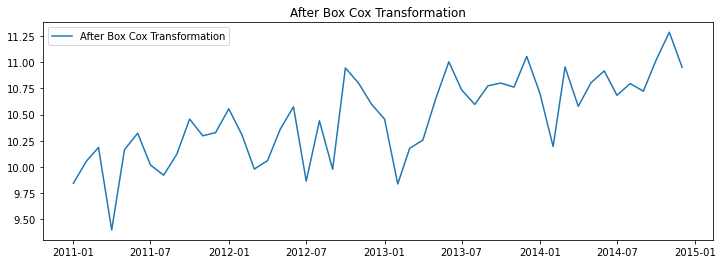

In [162]:
data_boxcox = pd.Series(boxcox(data['Sales'],lmbda=0),index = data.index)
plt.figure(figsize=[12,4])
plt.plot(data_boxcox,label='After Box Cox Transformation')
plt.legend(loc='best')
plt.title('After Box Cox Transformation')
plt.show()

#### Differencing  to Remove trend

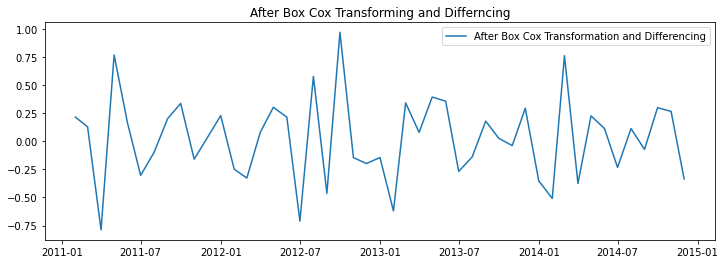

In [163]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(),data.index)
plt.figure(figsize=[12,4])
plt.plot(data_boxcox_diff, label = 'After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.title('After Box Cox Transforming and Differncing')
plt.show()

- Now the series look stationary

In [164]:
data_boxcox_diff.dropna(inplace=True)

In [165]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

#### Augmented Dickey-Fuller (ADF) test

In [166]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


Here in ADF diff, the p-value is < 0.05, so it is stationary.

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [167]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


In KPSS after difference the p-value > 0.05 and is stationary

### Autocorrelation function (ACF)

- autocorrelation helps us to know how a variable is influenced by its own lagged values
- The autocorrelation function tells about the correlation between an observation with its lagged values. It helps you to determine which lag of the observation is influencing it the most.

In [168]:
from statsmodels.graphics.tsaplots import plot_acf

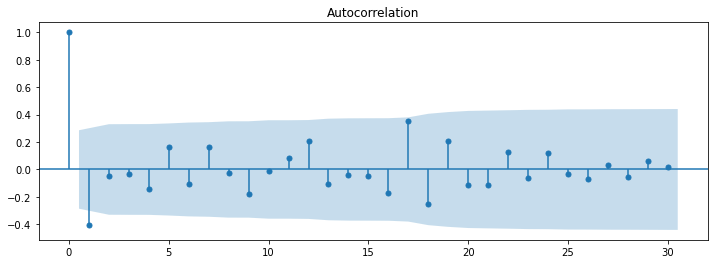

In [169]:
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

### Partial autocorrelation function (PACF)

In [170]:
from statsmodels.graphics.tsaplots import plot_pacf

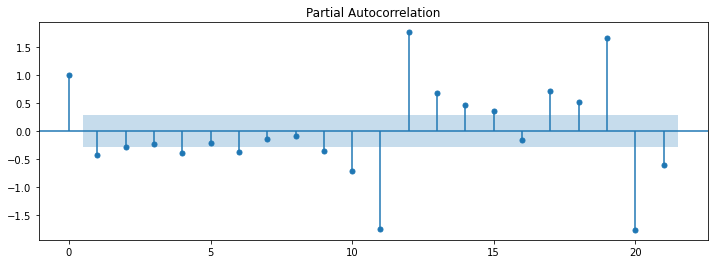

In [171]:
plt.figure(figsize=[12,4])
plot_pacf(data_boxcox_diff, ax = plt.gca(),lags=21)
plt.show()

In [172]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [173]:
train_data_boxcox_diff

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
2011-07-01   -0.303937
2011-08-01   -0.098320
2011-09-01    0.201126
2011-10-01    0.335976
2011-11-01   -0.159845
2011-12-01    0.030117
2012-01-01    0.227734
2012-02-01   -0.248683
2012-03-01   -0.327663
2012-04-01    0.079944
2012-05-01    0.301872
2012-06-01    0.213622
2012-07-01   -0.710884
2012-08-01    0.577494
2012-09-01   -0.463894
2012-10-01    0.969434
2012-11-01   -0.146063
2012-12-01   -0.198531
2013-01-01   -0.144942
2013-02-01   -0.620558
2013-03-01    0.341112
2013-04-01    0.078691
2013-05-01    0.392955
2013-06-01    0.355907
2013-07-01   -0.268628
2013-08-01   -0.139388
2013-09-01    0.178702
2013-10-01    0.026014
2013-11-01   -0.038982
2013-12-01    0.293485
2014-01-01   -0.353341
2014-02-01   -0.508883
2014-03-01    0.761118
2014-04-01   -0.375717
2014-05-01    0.225410
2014-06-01    0.113222
dtype: float64

### Auto regression method (AR)

The Simple Auto Regressive model predicts the future observation as linear regression of one or more past observations.

This model has a parameter ‘p’ called lag order. Lag order is the maximum number of lags used to build ‘p’ number of past data points to predict future data points.

In [174]:
from statsmodels.tsa.arima_model import ARIMA

In [175]:
model = ARIMA(train_data_boxcox_diff, order =(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


#### Recover Original Time Series

In [176]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

#### plot train-test forecast

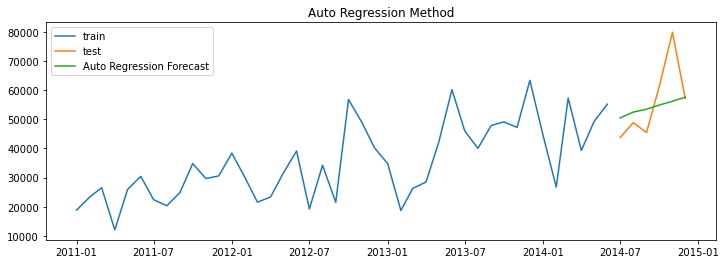

In [177]:
plt.figure(figsize=[12,4])
plt.plot(train['Sales'],label='train')
plt.plot(test['Sales'],label='test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto Regression Forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

#### RMSE and MAPE 

In [178]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponentail Smoothing,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


### Moving Average Method (MA)

The Moving Average Model models the future forecasts using past forecast errors in a regression-like model.

This model has a parameter ‘q’ called window size over which linear combination of errors are calculated.

In [179]:
model = ARIMA(train_data_boxcox_diff, order = (0,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


#### Recover the original series

In [180]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

#### plot test-train and forecast

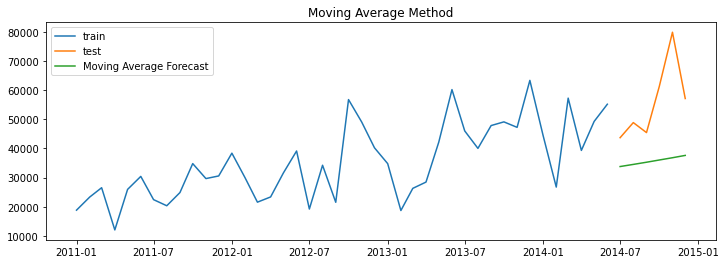

In [181]:
plt.figure(figsize=[12,4])
plt.plot(data['Sales'][:train_len],label='train')
plt.plot(data['Sales'][train_len:],label='test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():],label = 'Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

#### calculate RMSE and MAPE

In [182]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales'] - y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average(MA) Method'],'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results,tempResults])
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponentail Smoothing,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average(MA) Method,23360.02,33.93


### Auto Regression Moving Average Method (ARMA)

A time series that exhibits the characteristics of an AR(p) and/or an MA(q) process can be modelled using an ARMA(p,q) model.

In [183]:
model = ARIMA(train_data_boxcox_diff,order=(1,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


In [184]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

#### plot train-test and forecast

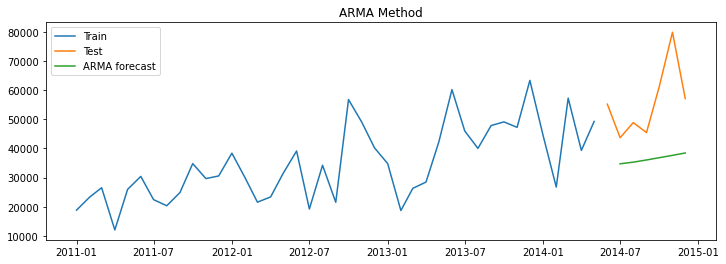

In [185]:
plt.figure(figsize=(12,4))
plt.plot( data['Sales'][:train_len-1], label='Train')
plt.plot(data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [186]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales'] - y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Moving Average (ARMA) Method'], 'RMSE' : [rmse], 'MAPE' : [mape]})
results = pd.concat([results,tempResults])
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponentail Smoothing,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average(MA) Method,23360.02,33.93
0,Auto Regressive Moving Average (ARMA) Method,22654.32,32.40


### Auto Regressive Integrated Moving Average (ARIMA)

Here, you are just applying boxcox before building the model and letting the model take care of the differencing i.e. the trend component itself.

In [187]:
model = ARIMA(train_data_boxcox,order=(1,1,1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


#### Recover Original time series forecast

In [188]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

#### plot train-test forecast

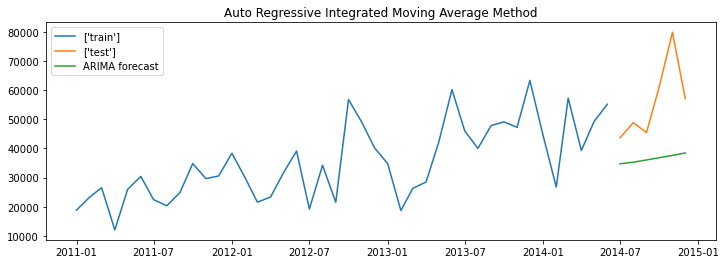

In [189]:
plt.figure(figsize=[12,4])
plt.plot(train['Sales'], label = ['train'])
plt.plot(test['Sales'],  label =['test'])
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label = 'ARIMA forecast')
plt.legend(loc='best')
plt.title('Auto Regressive Integrated Moving Average Method')
plt.show()

#### Calculate RMSE and MAPE

In [190]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales'] - y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE' : [rmse], 'MAPE' : [mape]})
results = pd.concat([results,tempResults])
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponentail Smoothing,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average(MA) Method,23360.02,33.93
0,Auto Regressive Moving Average (ARMA) Method,22654.32,32.40


### Seasonal auto regressive integrated moving average (SARIMA)

SARIMA brings all the features of an ARIMA model with an extra feature - seasonality. 

In [191]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [192]:
model = SARIMAX(train_data_boxcox, order=(1,1,1),seasonal_order = (1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041622
ma.L1      -0.996737
ar.S.L12    0.099996
ma.S.L12   -0.968194
sigma2      0.058472
dtype: float64


#### Recover original time series forecast

In [193]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

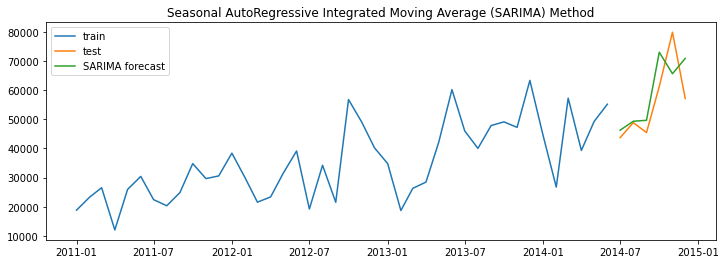

In [194]:
plt.figure(figsize=[12,4])
plt.plot(train['Sales'], label='train')
plt.plot(test['Sales'], label='test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label = 'SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal AutoRegressive Integrated Moving Average (SARIMA) Method')
plt.show()

#### Calculate RMSE and MAPE

In [195]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales'] - y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE' : [rmse], 'MAPE' : [mape]})
results = pd.concat([results, tempResults])
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,14756.73,15.82
0,Simple Exponential Smoothing,15011.49,15.99
0,Holt's Exponentail Smoothing,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average(MA) Method,23360.02,33.93
0,Auto Regressive Moving Average (ARMA) Method,22654.32,32.40


In all of the Auto Regressive Models SARIMA has performed well.

### Conclusion

#### Hence, we conclude that, *Holt Winters Additive method* is the best forecasting method in the smoothing techniques
#### And *SARIMA* is the best method in ARIMA set of techniques.